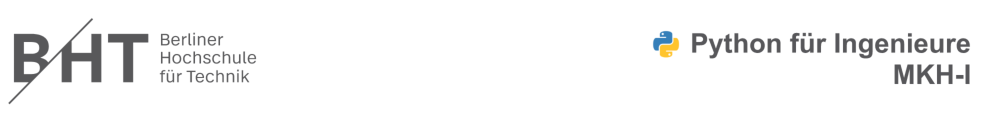

# Anwendungsbeispiel 2: Schraubenbemessung 

## Funktion

In [26]:
def ec5_87_tragfähigkeit_vg(Hersteller, d, L, t_1, t_2, t_Blech, rho_k, alpha):
    
    ##Nachweisführung
    nw = []
    
    #====================Fehlermeldungen=================
    #====================================================
    
    if t_Blech != 0 and t_1 != 0 and t_2 != 0:
        fehler = "keine zweischnittigen Verbindungen"
        nw.append(fehler)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw

    elif t_Blech == 0 and t_1 == 0 and t_2 == 0:
        fehler = "Dicken unzulässig" 
        nw.append(fehler)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw

    elif L in [t_1, t_Blech]:
        fehler = "Dicken unzulässig"
        nw.append(fehler)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw
    
    elif t_Blech == 0 and t_2 == 0:
        fehler = "Dicken unzulässig"
        nw.append(fehler)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw
    
    elif t_Blech == 0 and t_1 > L: # and t_1+t_2 > L:
        fehler = "Dicken unzulässig"
        nw.append(fehler)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw
    
    ##Holz-Holz-Verbindungen
    
    elif L >= (t_1+t_2) and t_Blech == 0:
        fehler = "Schraubenlänge muss kleiner als Holz sein"  
        nw.append(fehler)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw
    
    ##Holz-Stahl-Verbindungen
    
    elif t_Blech != 0 and t_1 == 0 and t_2 != 0:
        fehler = "Fehler"        
        nw.append(fehler)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw
    
    elif L >= (t_Blech+t_1) and t_2 == 0:
        fehler = "Schraubenlänge muss kleiner als Stahl-Holz sein"          
        nw.append(fehler)
        F_axRk = 0
        F_vRk = 0
        return F_axRk, F_vRk, nw
        
    else:
        #====================Vorbereitung====================
        #====================================================

        #Listen
        ##herstellerspezifische Kennwerte
        if Hersteller == 'Würth':
            #WÜrth
            L_d = [6, 8, 10, 12]
            L_f_axk = [11.5, 11, 10, 10]
            L_f_tensk = [11, 20, 32, 45]
            L_d_h = [14, 22, 25.2, 29.4]
            L_f_head = [13, 13, 10, 10]


        #Bearbeitung der Eingabwerte
        ##Index
        index = L_d.index(d)

        ##Zugriff auf Listenelemente
        d_h = L_d_h[index]
        f_head = L_f_head[index]
        f_axk = L_f_axk[index]
        f_1k = 80*10**(-6)*rho_k**2 #N/mm2
        f_2k = 80*10**(-6)*rho_k**2 #N/mm2 Kopfdurchziehparameter
        f_tensk = L_f_tensk[index]
        M_yrk = 0.15*600*d**(2.6)
        f_hk = (0.082*rho_k*d**(-0.3))

        #mUmrechnung in Bogenmaß
        alph = alpha*pi/180

        #Effektive Länge der Schraube
        if t_Blech != 0:
            l_ef = L-t_Blech
        elif t_Blech == 0:
            l_ef = min(L-t_1, t_1)

        #====================Axialtragfähigkeit====================
        #==========================================================

        ##Ausziehwiderstand
        if alpha <= 45:
            k_axk = 0.3+(0.7*alpha)/45
        else:
            k_axk = 1

        F_axrk1 = (k_axk*f_axk*d*l_ef) * (rho_k/350)**0.8 #N

        ###Umrechnung in Kilonewton
        F_axRk1 = F_axrk1/1000 #kN

        ##Kopfdurchziehwiderstand
        F_headrk = f_head*(d_h)**2 * (rho_k/350)**0.8 #N

        ###Umrechnung in Kilonewton
        F_headRk = F_headrk/1000 #kN

        ##Zugfestigkeit
        F_tRk = f_tensk #kN

        ##resultierende Axialtragfähigkeit
        ###if-Abfrage, ob Kopfdurchziehwiderstand berücksichtigt werden muss
        if t_Blech != 0 or t_1 > 4*d:
            F_axRk = min(F_axRk1, F_tRk)
            nw.append('A: o. Kopfdurchzieh')

            ###Umrechnung in Kilonewton
            F_axrk = min(F_axrk1, F_tRk*1000)

        elif t_Blech == 0 or t_1 < 4*d:
            F_axRk = min(F_axRk1, F_headRk, F_tRk)
            nw.append('A: m. Kopfdurchzieh')

            ###Umrechnung in Kilonewton
            F_axrk = min(F_axrk1, F_headrk, F_tRk*1000)

        #====================Schertragfähigkeit====================
        #==========================================================

        ##einschnittige Holz-Holz-Verbindung
        if t_Blech == 0:
            nw.append('S: H-H')

            F_vk1 = round(f_hk*t_1*d, 2)
            F_vk2 = round(f_hk*l_ef*d,2)
            F_vk3 = round((f_hk*t_1*d)/2 * ( sqrt(1+2*(1+l_ef/t_1+(l_ef/t_1)**2)+(l_ef/t_1)**2)-(1+l_ef/t_1))+F_axrk/4,2)
            F_vk4 = 1.05*(f_hk*t_1*d)/(3) * (sqrt(4+(12*M_yrk)/(f_hk*t_1**2*d))-1)+F_axrk/4
            F_vk5 = 1.05*(f_hk*l_ef*d)/(3) * (sqrt(4+(12*M_yrk)/(f_hk*l_ef**2*d))-1)+F_axrk/4
            F_vk6 = 1.15*sqrt(2*M_yrk*f_hk*d)+F_axrk/4
            F_vrk = min(F_vk1, F_vk2, F_vk3, F_vk4, F_vk5, F_vk6)

            ###Umrechnung in Kilonewton
            F_vRk1 = round(F_vk1/1000,2)
            F_vRk2 = round(F_vk2/1000,2)
            F_vRk3 = round(F_vk3/1000,2)
            F_vRk4 = round(F_vk4/1000,2)
            F_vRk5 = round(F_vk5/1000,2)
            F_vRk6 = round(F_vk6/1000,2)
            F_vRk = round(F_vrk/1000,2)

        ##Einschnittige Holz-Stahl-Verbindung (dickes Blech)¶
        elif t_Blech >= d:
            nw.append('S: H-S (dick)')

            F_vk1 = f_hk*t_1*d
            F_vk2 = f_hk*t_1*d*(sqrt(2+(4*M_yrk)/(f_hk*d*t_1**2))-1)+F_axrk/4
            F_vk3 = 2.3*sqrt(M_yrk*f_hk*d)+F_axrk/4
            F_vrk = min(F_vk1, F_vk2, F_vk3)

            ###Umrechnung in Kilonewton
            F_vRk1 = round(F_vk1/1000,2)
            F_vRk2 = round(F_vk2/1000,2)
            F_vRk3 = round(F_vk3/1000,2)
            F_vRk4 = '-'
            F_vRk5 = '-'
            F_vRk6 = '-'
            F_vRk = round(F_vrk/1000,2)

        ##Einschnittige Holz-Stahl-Verbindung (dünnes Blech)¶
        elif t_Blech < d and t_Blech != 0:
            nw.append('S: H-S (dünn)')

            F_vk1 = 0.4*f_hk*t_1*d
            F_vk2 = 1.15*sqrt(2*M_yrk*f_hk*d)+F_axrk/4
            F_vrk = min(F_vk1, F_vk2)

            ###Umrechnung in Kilonewton
            F_vRk1 = round(F_vk1/1000,2)
            F_vRk2 = round(F_vk2/1000,2)
            F_vRk3 = '-'
            F_vRk4 = '-'
            F_vRk5 = '-'
            F_vRk6 = '-'
            F_vRk = round(F_vrk/1000,2)

        return round(F_axRk,2), F_vRk, nw